In [1]:
import pickle
from multiscale_new import *

## Getting data

In [2]:
Data1 = pickle.load(open( "Data1.p", "rb" ))  ## 1d schwefel
Data2 = pickle.load(open( "Data2.p", "rb" )) ## 1d noisy gramacy and lee
Data3 = pickle.load(open( "Data3.p", "rb" )) ## 2d Schwefel
Data4 = pickle.load(open( "Data4.p", "rb" )) ## 2d DEM dataset

In [3]:
rcParams["mathtext.fontset"] = "cm"  ## required for properly displaying labels

## Data1

In [4]:
Data = Data1[:,0:-1]
delta1 = 1.0e-3
maxs1 = 15
eps1 = epsilon_0(Data,maxs1,delta1)
sparse1,Bs1,Cs1,f1,T1,eps_data1 = Multiscale_train(Data,eps1,maxs1)



Data = Data3[:,0:-1]
delta2 = 1.0e-2
maxs2 = 15
eps2 = epsilon_0(Data,maxs2,delta2)
sparse2,Bs2,Cs2,f2,T2,eps_data2 = Multiscale_train(Data,eps2,maxs2)

In [5]:
def plot_rate(ax,eps_data,delta):
    e0 = eps_data[0,0]
    v0 = eps_data[0,1]
    t0 = eps_data[0,2]
    p = []
    for j in eps_data:
        p.append([j[0],v0/j[1],(v0/j[1])*(j[2]/t0)])



    p = np.array(p)
    epsilon =  eps_data[:,0]
    term1 = p[:,1]
    term2 = np.max(np.concatenate((p[:,2].reshape(-1,1),np.ones([len(p),1])),axis = 1),axis=1)

    ax.plot(np.arange(len(p)),epsilon,color = 'g',label = r'$\epsilon_s$')
    ax.plot(np.arange(len(p)),term1,color = 'm',label = r'$\vartheta_0 / \vartheta_s$')
    ax.plot(np.arange(len(p)),term2,color = 'r',
         label = r'$\max \left\{\frac{\vartheta_0||t_s||_2}{\vartheta_s ||t_0||_2},1 \right\}$')
    ax.plot(np.arange(len(p)),delta*np.ones([len(p),1]),linestyle ='-.',color = 'k',label = r'$\delta$')

    ax.set_yscale('log')
    ax.set_xlabel('Scale',size = 15)
    xticks(size = 15)
    yticks(size = 15)
    ax.grid(True)
    legend(prop = {'size':15})
    

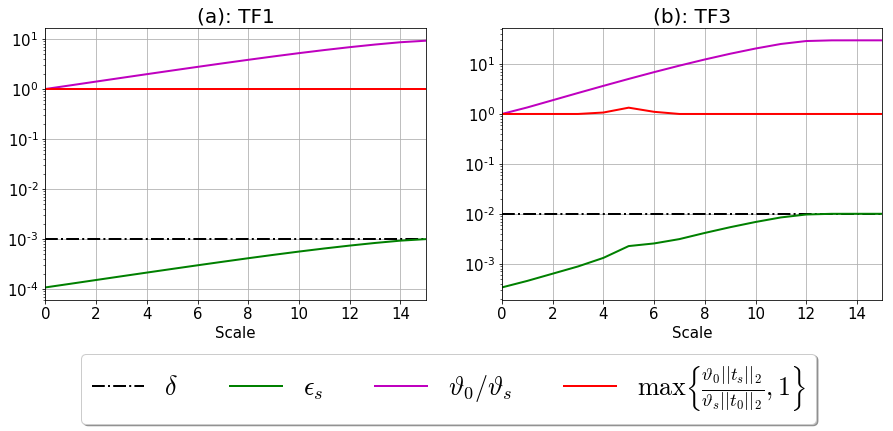

In [6]:
fig = figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
eps_data = eps_data1
delta = delta1
e0 = eps_data[0,0]
v0 = eps_data[0,1]
t0 = eps_data[0,2]
p = []
for j in eps_data:
    p.append([j[0],v0/j[1],(v0/j[1])*(j[2]/t0)])



p = np.array(p)
epsilon =  eps_data[:,0]
term1 = p[:,1]
term2 = np.max(np.concatenate((p[:,2].reshape(-1,1),np.ones([len(p),1])),axis = 1),axis=1)
ax.plot(np.arange(len(p)),delta*np.ones([len(p),1]),lw = 2,linestyle ='-.',color = 'k',label = r'$\delta$')
ax.plot(np.arange(len(p)),epsilon,color = 'g',lw = 2,label = r'$\epsilon_s$')
ax.plot(np.arange(len(p)),term1,color = 'm',lw = 2,label = r'$\vartheta_0 / \vartheta_s$')
ax.plot(np.arange(len(p)),term2,color = 'r',lw = 2,
     label = r'$\max \left\{\frac{\vartheta_0||t_s||_2}{\vartheta_s ||t_0||_2},1 \right\}$')

ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xlabel('Scale',size = 15)
xticks(size = 15)
yticks(size = 15)
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(1.06, -0.15),
          fancybox=True, shadow=True, ncol=5,fontsize=26)
ax.set_title('(a): TF1',size = 20)
################################

ax = fig.add_subplot(1,2,2)
eps_data = eps_data2
delta = delta2
e0 = eps_data[0,0]
v0 = eps_data[0,1]
t0 = eps_data[0,2]
p = []
for j in eps_data:
    p.append([j[0],v0/j[1],(v0/j[1])*(j[2]/t0)])



p = np.array(p)
epsilon =  eps_data[:,0]
term1 = p[:,1]
term2 = np.max(np.concatenate((p[:,2].reshape(-1,1),np.ones([len(p),1])),axis = 1),axis=1)
ax.plot(np.arange(len(p)),delta*np.ones([len(p),1]),lw = 2,linestyle ='-.',color = 'k',label = r'$\delta$')
ax.plot(np.arange(len(p)),epsilon,color = 'g',lw = 2,label = r'$\epsilon_s$')
ax.plot(np.arange(len(p)),term1,color = 'm',lw =2,label = r'$\vartheta_0 / \vartheta_s$')
ax.plot(np.arange(len(p)),term2,color = 'r',lw = 2,
     label = r'$\max \left\{\frac{\vartheta_0||t_s||_2}{\vartheta_s ||t_0||_2},1 \right\}$')

ax.set_title('(b): TF3',size = 20)
ax.set_yscale('log')
ax.set_xlabel('Scale',size = 15)
ax.set_xlim([0,15])
xticks(size = 15)
yticks(size = 15)
ax.grid(True)
savefig('Pic4.pdf', bbox_inches='tight')
show()